In [1]:
import numpy as np
from scipy.spatial import distance
from scipy.linalg import solve
import re
import math
import matplotlib.pylab as plt

## Sub 1

In [134]:
data = []
with open('text.txt', 'r') as inf:
    for line in inf:
        line = re.split('[^a-z]', line.strip().lower())
        new_line = []
        for word in line:
            if word != '':
                new_line.append(word)
        data.append(new_line)

In [135]:
data[0]

['in',
 'comparison',
 'to',
 'dogs',
 'cats',
 'have',
 'not',
 'undergone',
 'major',
 'changes',
 'during',
 'the',
 'domestication',
 'process']

In [136]:
word_count = {}
for line in data:
    for word in line:
        if word in word_count.keys():
            word_count[word] += 1
        else:
            word_count[word] = 1

In [137]:
len(word_count)

254

In [138]:
word_count

{'in': 11,
 'comparison': 1,
 'to': 14,
 'dogs': 1,
 'cats': 4,
 'have': 2,
 'not': 1,
 'undergone': 1,
 'major': 2,
 'changes': 2,
 'during': 1,
 'the': 20,
 'domestication': 1,
 'process': 2,
 'as': 6,
 'cat': 10,
 'simply': 2,
 'catenates': 1,
 'streams': 1,
 'of': 19,
 'bytes': 2,
 'it': 4,
 'can': 3,
 'be': 3,
 'also': 2,
 'used': 1,
 'concatenate': 2,
 'binary': 1,
 'files': 1,
 'where': 2,
 'will': 2,
 'just': 3,
 'sequence': 2,
 'a': 13,
 'common': 1,
 'interactive': 1,
 'use': 2,
 'for': 4,
 'single': 1,
 'file': 5,
 'is': 7,
 'output': 3,
 'content': 2,
 'standard': 1,
 'hear': 1,
 'sounds': 1,
 'too': 2,
 'faint': 1,
 'or': 3,
 'high': 1,
 'frequency': 1,
 'human': 2,
 'ears': 1,
 'such': 2,
 'those': 1,
 'made': 1,
 'by': 3,
 'mice': 1,
 'and': 14,
 'other': 2,
 'small': 2,
 'animals': 1,
 'one': 4,
 'people': 1,
 'deliberately': 1,
 'tamed': 1,
 'artificial': 1,
 'selection': 1,
 'they': 1,
 'were': 2,
 'useful': 1,
 'predators': 1,
 'vermin': 1,
 'domesticated': 1,
 'its'

In [139]:
word_line = []

for line in data:
    check_line = {}
    for word in word_count.keys():
        if word in check_line.keys():
            pass
        elif word in line:
            check_line[word] = line.count(word)
        else:
            check_line[word] = 0
            
    word_line.append(check_line)

In [140]:
len(word_line)

22

In [141]:
mat = []
for line in word_line:
    append = []
    for num in line.values():
        append.append(num)
    mat.append(append)
len(mat)

22

In [142]:
len(mat[0])

254

In [143]:
matrix = np.array([line for line in mat])

In [144]:
matrix.shape

(22, 254)

In [145]:
v = matrix[0]
dist = {}
for i, vector in enumerate(matrix):
    dist[i] = distance.cosine(v, vector)


In [146]:
dist

{0: 0.0,
 1: 0.9527544408738466,
 2: 0.8644738145642124,
 3: 0.8951715163278082,
 4: 0.7770887149698589,
 5: 0.9402385695332803,
 6: 0.7327387580875756,
 7: 0.9258750683338899,
 8: 0.8842724875284311,
 9: 0.9055088817476932,
 10: 0.8328165362273942,
 11: 0.8804771390665607,
 12: 0.8396432548525454,
 13: 0.8703592552895671,
 14: 0.8740118423302576,
 15: 0.9442721787424647,
 16: 0.8406361854220809,
 17: 0.956644501523794,
 18: 0.9442721787424647,
 19: 0.8885443574849294,
 20: 0.8427572744917122,
 21: 0.8250364469440588}

Answer: 1, 17

In [149]:
sorted(dist.values(), reverse=False)    

[0.0,
 0.7327387580875756,
 0.7770887149698589,
 0.8250364469440588,
 0.8328165362273942,
 0.8396432548525454,
 0.8406361854220809,
 0.8427572744917122,
 0.8644738145642124,
 0.8703592552895671,
 0.8740118423302576,
 0.8804771390665607,
 0.8842724875284311,
 0.8885443574849294,
 0.8951715163278082,
 0.9055088817476932,
 0.9258750683338899,
 0.9402385695332803,
 0.9442721787424647,
 0.9442721787424647,
 0.9527544408738466,
 0.956644501523794]

## Sub 2

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

In [15]:
def f(x):
    f = math.sin(x/5) * math.exp(x/10) + 5*math.exp(-x/2)
    return f

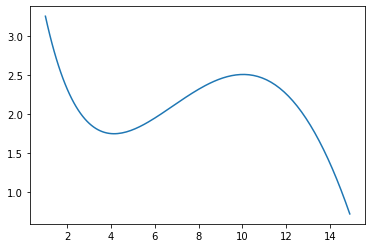

In [114]:
x = np.arange(1, 15, 0.1)
y = [f(i) for i in x]
plt.plot(x, y)
plt.show()

In [118]:
A = np.array([[1, 1],[1, 15]])
b = np.array([f(1), f(15)])
ans1 = solve(A, b)
ans1

array([ 3.43914511, -0.18692825])

In [120]:
f1 = 1 * ans1[1] + ans1[0]
f2 = 15* ans1[1] + ans1[0]
f1, f2

(3.2522168652714187, 0.6352214195786656)

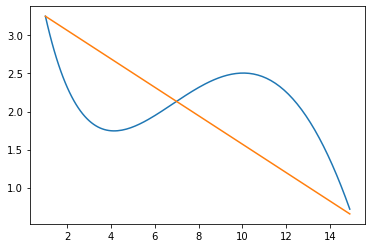

In [123]:
def f1_(x):
    f1_ = x * ans1[1] + ans1[0]
    return f1_

plt.plot(x,y)
plt.plot(x, [f1_(i) for i in x])
plt.show()

In [183]:
A = np.array([[1, 1, 1], [1, 8, 64], [1, 15, 15**2]])
b = np.array([f(1), f(8), f(15)])
ans2 = solve(A, b)
ans2

array([ 3.32512949, -0.06531159, -0.00760104])

In [181]:
w0 = np.array([1, 1, 1]).dot(ans2)
w1 = np.array([1, 8, 15]).dot(ans2)
w2 = np.array([1, 64, 225]).dot(ans2)
f2 = [w0, w1, w2]
f2

[3.252216865271419, 2.316170159053224, 0.6352214195786683]

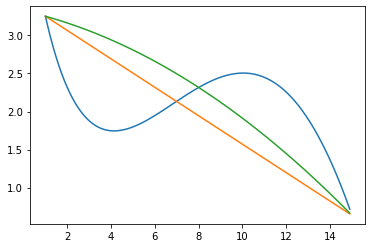

In [184]:
def f2_(x):
    f2_ = x **2 * ans2[2] + x * ans2[1] + ans2[0]
    return f2_

plt.plot(x,y)
plt.plot(x, f1_(x))
plt.plot(x, f2_(x))
plt.show()

In [185]:
A = np.array([[1, 1, 1, 1], [1, 4, 4**2, 4**3], [1, 10, 10**2, 10**3], [1, 15, 15**2, 15**3]])
b = np.array([f(1), f(4), f(10), f(15)])
ans3 = solve(A, b)
ans3

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

In [188]:
v0 = np.array([1, 1, 1, 1]).dot(ans3)
v1 = np.array([1, 4, 10, 15]).dot(ans3)
v2 = np.array([1, 16, 10**2, 15**2]).dot(ans3)
v3 = np.array([1, 4**3, 10**3, 15**3]).dot(ans3)
f3 = [v0, v1, v2, v3]
f3

[3.2522168652714187, 0.9903717749540031, 1.1148908721546147, 86.99051044220298]

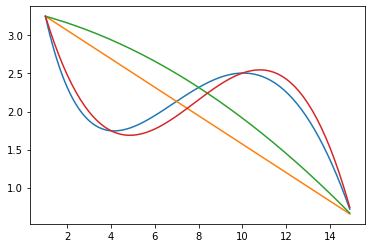

In [189]:
def f3_(x):
    f3_ = x**3 * ans3[3] + x**2 * ans3[2] + x * ans3[1] + ans3[0]
    return f3_

plt.plot(x,y) # original - blue
plt.plot(x, f1_(x)) # 1 orange
plt.plot(x, f2_(x)) # 2 green
plt.plot(x, f3_(x)) # 3 red
plt.show()